In [ ]:
import alibi_detect
alibi_detect.od.__all__
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

from alibi_detect.od import IForest
from alibi_detect.utils.visualize import plot_instance_score, plot_roc

from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("..\\data\\urls_with_features_selected.csv")
api_data = pd.read_csv("..\\data\\api_urls.csv")
X = data.loc[:, data.columns != 'type']
y = data['type']
X_api_data = api_data.loc[:, data.columns != 'type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
detector_name = 'IForest'

od = IForest(threshold=0.5,  # threshold for outlier score
                 n_estimators=100)
    
    # train
od.fit(X_train)

In [ ]:
od.fit(X_train)

In [ ]:
od.infer_threshold(
    X,
    threshold_perc=95
)

In [ ]:
preds = od.predict(
   X_api_data, 
    return_instance_score=True
)

F1 score: 0.4444


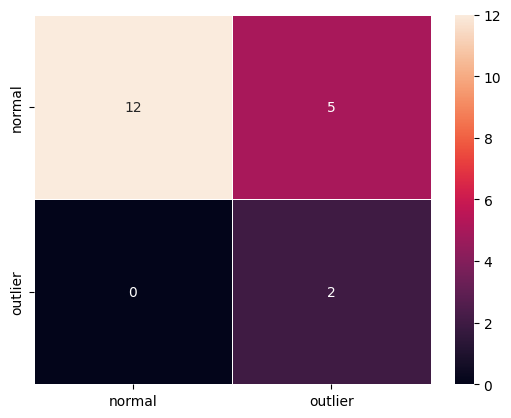

In [ ]:
y_outlier = api_data['type'].values

labels = ["normal", "outlier"]

y_pred = preds['data']['is_outlier']

f1 = f1 = f1_score(y_outlier, y_pred)

print('F1 score: {:.4f}'.format(f1))

cm = confusion_matrix(y_outlier, y_pred)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(df_cm, annot=True, cbar=True, linewidths=.5)
plt.show()

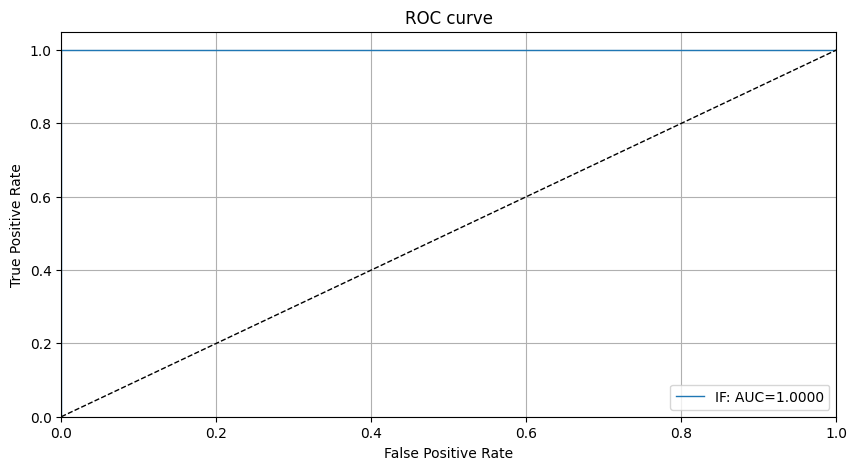

In [ ]:
roc_data = {'IF': {'scores': preds['data']['instance_score'], 'labels': y_outlier}}
plot_roc(roc_data)

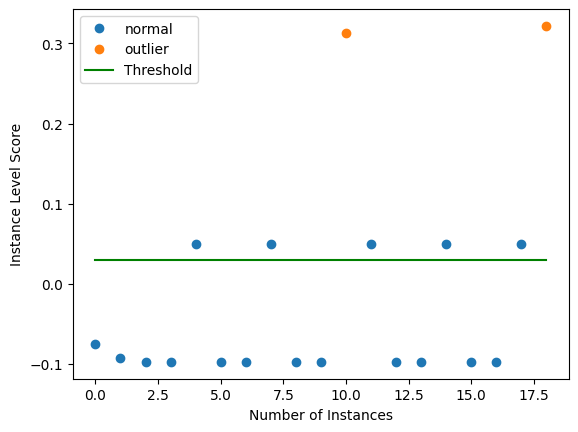

In [ ]:
plot_instance_score(preds, y_outlier, labels, od.threshold)

In [ ]:
from alibi_detect.cd import KSDrift

cd = KSDrift(X_train, p_val=0.05)

In [ ]:
preds = cd.predict(X_api_data, drift_type='batch', return_p_val=True, return_distance=True)

In [ ]:
preds

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the report in markdown
with open('..//reports//outliers_detection_report.md', 'w') as f:
    f.write("# Isolation Forest outlier detection on URLs \n\n")
    f.write("In the context of our project on URL detection, Isolation Forests prove to be particularly effective. Given the diverse and dynamic nature of URLs, this method excels at identifying unusual patterns and isolating potentially malicious or anomalous URLs. By leveraging the inherent ability of Isolation Forests to efficiently detect outliers through random feature selections, our project benefits from a robust and adaptable approach to URL anomaly detection. The application of Isolation Forests aligns with the unique challenges posed by URL datasets, allowing for accurate and efficient identification of suspicious URLs in a variety of contexts. \n\n")
    
    # Data section
    f.write("## Data\n\n")
    f.write("### Test Set\n\n")
    # Convert the API data to markdown format and write to the file
    f.write("The Isolation Forest algorithm was applied to a specific test set comprising URLs. This dataset encompasses a diverse range of URLs, including both normal and potentially anomalous instances. The effectiveness of the Isolation Forest method in detecting outliers is evaluated based on this test set.\n\n")

    f.write(api_data[:5].to_markdown(index=False) + "\n\n")

    # Confusion Matrix section
    f.write("## Confusion Matrix\n\n")

    # Include the saved image in the markdown report
    f.write("### Evaluation through Confusion Matrix\n\n")
    f.write("The confusion matrix provides a comprehensive view of the model's performance by illustrating the counts of true positive, true negative, false positive, and false negative predictions. The heatmap below visually represents the confusion matrix.\n\n")
    
    f.write("![Confusion Matrix](..//reports//figures//performance_monitoring//confusion_matrix.png)\n\n")

    # ROC Curve section
    f.write("## ROC Curve\n\n")
    # Comment: Describe the ROC curve and its significance in assessing model performance
    f.write("The Receiver Operating Characteristic (ROC) curve is a valuable tool for evaluating the trade-off between true positive rate and false positive rate across different threshold settings. The ROC curve visually represents the model's ability to discriminate between normal and anomalous instances.\n\n")

    # Include the saved ROC curve image in the markdown report
    f.write("![ROC Curve](..//reports//figures//performance_monitoring//roc_curve.png)\n\n")

    # Number of Instances section
    f.write("## Number of Instances\n\n")
    f.write("Understanding the distribution of instances, both normal and anomalous, within the dataset is crucial for gaining insights into the data's characteristics. The plot below displays the distribution of instances based on their types.\n\n")
    f.write("![Number of Instances](..//reports//figures//performance_monitoring//num_of_instances.png)\n\n")